<a href="https://colab.research.google.com/github/SafwanAhmad/google-colab/blob/master/Copy_of_advanced_lane_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [6]:
!ls /content/drive/My\ Drive/data_driver_view | head -10

00002207.png
00002208.png
00002209.png
00002210.png
00002211.png
00002212.png
00002213.png
00002214.png
00002215.png
00002216.png


In [0]:
def plot_img_grid(images, nb_cols):
    nb_images = len(images)
    nb_rows = int(np.ceil(nb_images/nb_cols))
    
    for i in range(nb_rows):
        plt.figure(figsize=(32, 4))
        for j in range(nb_cols):
            plt.subplot(1, nb_cols, j+1)
            image = images[i*nb_cols + j]
            nb_channels = 1 if len(image.shape) == 2 else image.shape[-1]
            plt.imshow(image, cmap='gray' if nb_channels == 1 else None)
            plt.xticks([])
            plt.yticks([])
        plt.show()

In [8]:
import os
from glob import glob
from tqdm import tqdm

if os.path.exists('./cache/road_data.npy'):
  print('Loading data from cache...')
  road_data = np.load('./cache/road_data.npy')
  print(f'Data with dimensions {road_data.shape} loaded.')
else:
  road_data = []
  os.makedirs('./cache',exist_ok=True)
  filenames = glob('/content/drive/My Drive/data_driver_view/*.png')
  print('Loading data from Google Drive')
  for name in tqdm(filenames):
    img_bgr = cv2.imread(name)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    road_data.append(img_rgb)
  np.save('./cache/road_data.npy',road_data)
  print(f'{len(road_data)} images loaded')

  0%|          | 0/355 [00:00<?, ?it/s]

Loading data from Google Drive


100%|██████████| 355/355 [02:14<00:00,  2.63it/s]


355 images loaded


In [0]:

grad_x = cv2.Sobel(road_data[0], cv2.CV_16S, 1, 0)
grad_y = cv2.Sobel(road_data[0], cv2.CV_16S, 0, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


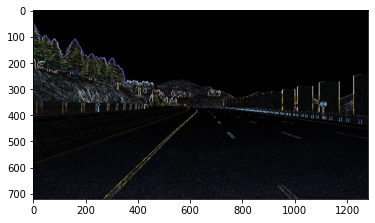

In [10]:
plt.imshow(np.abs(grad_x))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


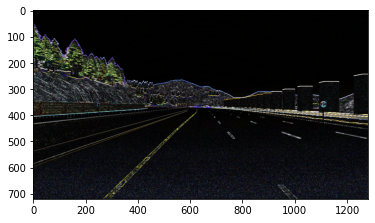

In [11]:
plt.imshow(np.abs(grad_y))

In [0]:
# Find the connected compnents
abs_grad_x = np.abs(grad_x)
abs_grad_y = np.abs(grad_y)

# Scale the gradients
max_x = np.max(abs_grad_x, axis=(0,1))
min_x = np.min(abs_grad_x, axis=(0,1))

max_y = np.max(abs_grad_y, axis=(0,1))
min_y = np.min(abs_grad_y, axis=(0,1))


scaled_grad_x = (((abs_grad_x - min_x)/(max_x - min_x))*255).astype(np.uint8)
scaled_grad_y = (((abs_grad_y - min_y)/(max_y - min_y))*255).astype(np.uint8)

# Convert to binary value
bin_grad_x = cv2.threshold(scaled_grad_x[:,:,0], 0, 255, cv2.THRESH_OTSU+cv2.THRESH_BINARY)
bin_grad_y = cv2.threshold(scaled_grad_y[:,:,0], 0, 255, cv2.THRESH_OTSU+cv2.THRESH_BINARY)

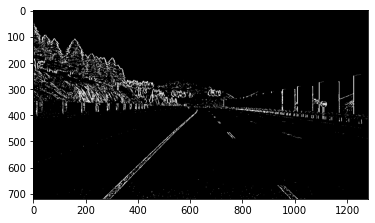

In [48]:
plt.imshow(bin_grad_x[1], cmap='gray')

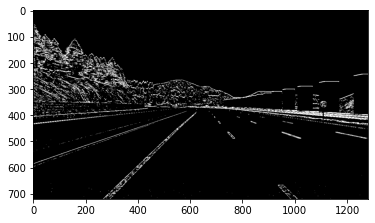

In [49]:
plt.imshow(bin_grad_y[1], cmap='gray')

In [0]:
# Find connected components
retval, labels, stats, centroids = cv2.connectedComponentsWithStats(bin_grad_x[1])

(array([[720.,   0.,   0., ...,   0.,   0.,   0.],
        [692.,   7.,   8., ...,   0.,   1.,   0.],
        [700.,   9.,   7., ...,   0.,   0.,   0.],
        ...,
        [720.,   0.,   0., ...,   0.,   0.,   0.],
        [719.,   0.,   0., ...,   0.,   1.,   0.],
        [720.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([   0. ,  287.3,  574.6,  861.9, 1149.2, 1436.5, 1723.8, 2011.1,
        2298.4, 2585.7, 2873. ]),
 <a list of 1280 Lists of Patches objects>)

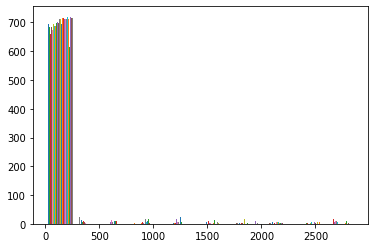

In [52]:
plt.hist(labels)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
